# An Observation About the Simple Symmetric Random Walk

In this post, I'll empirically verify an interesting fact about the simple symmetric random walk. 

## Setup 

### Simple Symmetric Random Walk

Suppose we have a sequence of independent, identically distributed random variables $X_1, X_2, ..., X_n, ...$ which are $1$ with probability $p$ and $-1$ with probability $1 - p$. That is, 

$$\forall i [P(X_{i} = k)] = 
\begin{cases}
p & k = 1 \\
1 - p & k = -1 \\
0 & \text{otherwise}
\end{cases}$$

Then, let $S_{0} = 0$ and $$S_{n} = \sum\limits_{i = 1}^{n} X_{i}$$ 

The sequence of random variables $(S_{n})_{n = 1}^{\infty}$ is a **simple symmetric random walk.**

### Gambling Game

**Game**: Suppose a gambler is playing a game of chance. He starts with $\$x$ for some $0 < x < k$. At each round, he flips a biased coin with $P(\text{HEADS}) = p$. If the coin is heads, he gains $\$1$. If it is tails, he loses $\$1$. The game continues until he loses all his money, ending up with $\$0$, or attains $\$k$. The former outcome is a *loss* and the latter is a *win*.

Suppose that we start at 1, and at each step we go to +1 with probability $p$ and -1 with probability $1 - p$. What is the probability that we get to $k$? 

In [15]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
sns.set_style('whitegrid')

def walk_to_end(start_val, upper_limit, lower_limit = 0, p = 0.5): 
    '''
    Plays the gambling game described above until done. 
    start_val: Initial number of dollars
    upper_limit: Target number of dollars. Value at which game is won.
    lower_limit: Value at which game is lost.
    p: Probability of +1 at a step. 
    '''
    current_val = start_val
    num_trials = 0
    while current_val > lower_limit and current_val < upper_limit: 
        trial = np.random.binomial(1, p)
        if trial > 0: 
            current_val += 1
        else: 
            current_val -= 1
        num_trials += 1
    return num_trials, current_val == upper_limit

In [16]:
def empirical_success_estimator(num_runs, start_val, upper_limit, lower_limit = 0, p = 0.5):
    '''
    Estimates the probability of success in the gambling game, 
    averaged over a number of trials. 
    num_runs: Number of times the game is played.
    start_val: Initial number of dollars
    upper_limit: Target number of dollars. Value at which game is won.
    lower_limit: Value at which game is lost.
    p: Probability of +1 at a step. 
    '''
    num_success = 0 
    for _ in range(num_runs): 
        num_steps, success = walk_to_end(start_val, upper_limit, lower_limit, p)
        if success: 
            num_success += 1
    return num_success/num_runs

## Empirical Test



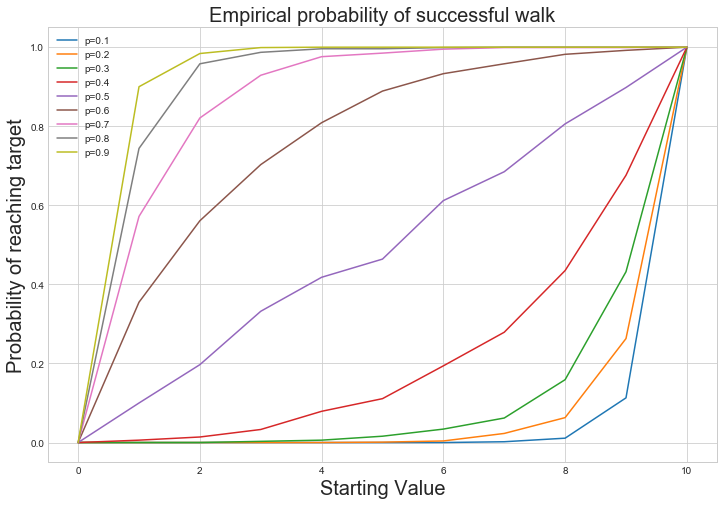

In [21]:
plt.figure(figsize=(12, 8))
for p in np.arange(0.1, 1, step=0.1):
    p_success_vals = []
    for i in range(0, 11): 
        p_success = empirical_success_estimator(1000, i, 10, 0, p)
        p_success_vals.append(p_success)
    plt.plot(np.arange(0, 11), p_success_vals, label='p={}'.format(np.round(p, decimals=1)))
plt.legend()
plt.xlabel('Starting Value', fontsize=20)
plt.ylabel('Probability of reaching target', fontsize=20)
plt.title('Empirical probability of successful walk', fontsize=20)
plt.savefig('empirical_probability.png')

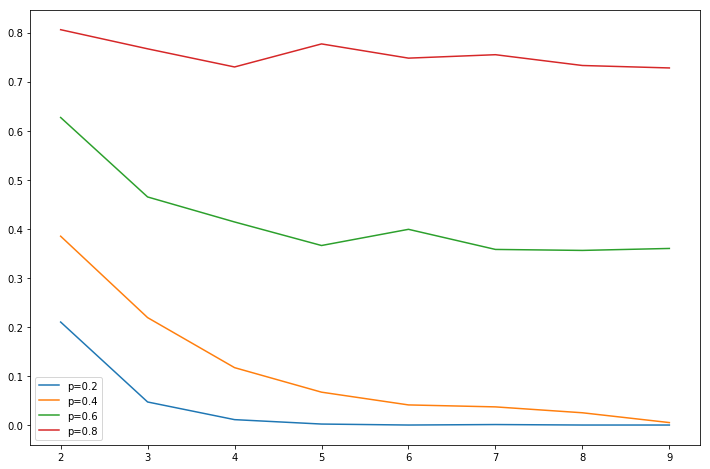

In [24]:
plt.figure(figsize=(12, 8))
for p in np.arange(0.2, 1, step=0.2):
#     print('p = {}'.format(p))
    p_success_vals = []
    for i in range(2, 10): 
        p_success = empirical_success_estimator(1000, 1, i, 0, p)
        p_success_vals.append(p_success)
#         print('Probability of reaching {} is {}'.format(i, p_success))
    plt.plot(np.arange(2, 10), p_success_vals, label='p={}'.format(np.round(p, decimals=1)))
plt.legend()

## Math 

**Theorem**: $$f_{k}(x) = \frac{(\frac{1 - p}{p})^{x} - 1}{(\frac{1 - p}{p})^{k} - 1}$$

Proof: We know that $f_{k}(k) = 1$ and $f_{k}(0) = 0$

If $0 < x < k$, then after 1 step the gambler has $\$x + 1$ with probability $p$ and $\$x - 1$ with probability $1 - p$. Therefore, $f_{k}(x) = pf_{k}(x + 1) + (1 - p)f_{k}(x-1)$. To solve, we can solve the characteristic equation $y = py^2 + (1-p)$. 

$$\begin{eqnarray} 
y = py^2 + (1-p) \\ 
y^2 - \frac{y}{p} + \frac{1-p}{p} = 0 \\
y = \frac{\frac{1}{p} \pm \sqrt{\frac{1}{p^2} - \frac{4-4p}{p}}}{2} &\text{Quadratic Formula}\\ 
= 1, \frac{1 - p}{p}
\end{eqnarray}$$

So the original equation becomes $f_{k}(x) = a(1)^{x} + b(\frac{1 - p}{p})^{x}$. We therefore have a system of equations in two variables $a, b$. 

$$\begin{eqnarray}
f_{k}(x) = a + b(\frac{1 - p}{p})^{x} \\
f_{k}(k) = a + b(\frac{1 - p}{p})^{k} = 1 \\
f_{k}(0) = a + b = 0 
\end{eqnarray}
$$

Solving this system gives the desired result of $f_{k}(x) = \frac{(\frac{1 - p}{p})^{x} - 1}{(\frac{1 - p}{p})^{k} - 1}$. 

TODO: prove the case where $p = 0.5$

TODO **Corollary**: If $f_{k, p}(x)$ denotes $f_{k}(x)$ with probability $p$ of HEADS for each coin flip, and $p_{1} + p_{2} = 1$, $p_{1}, p_{2} > 0$, then 

...

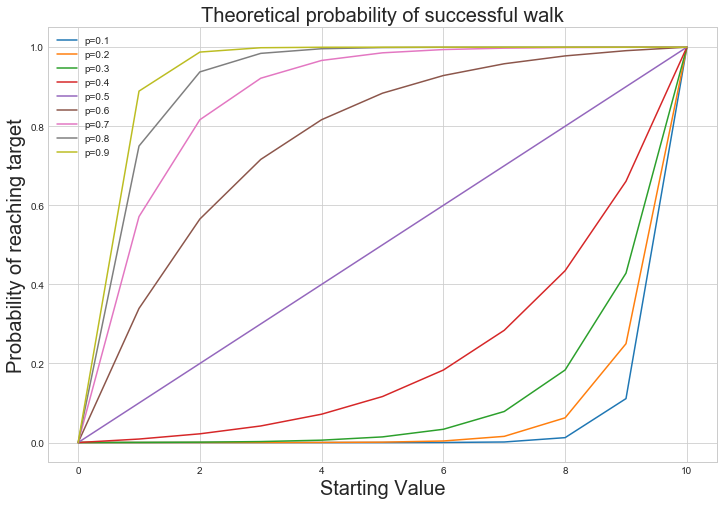

In [20]:
def fkx(start_val, upper_limit, p = 0.5):
    '''
    Theoretical probabilit of winning the gambling game,
    with lower limit 0.  
    start_val: Initial number of dollars
    upper_limit: Target number of dollars. Value at which game is won.
    p: Probability of +1 at a step. 
    '''
    x = start_val
    k = upper_limit
    if(p == 0.5):
        return (x/k)
    else: 
        return (((1 - p)/p)**x - 1)/(((1 - p)/p)**k - 1)

plt.figure(figsize=(12, 8))
for p in np.arange(0.1, 1, step=0.1):
    p_success_vals = []
    for i in range(0, 11): 
        p_success = fkx(p, 10, i)
        p_success_vals.append(p_success)
    plt.plot(np.arange(0, 11), p_success_vals, label='p={}'.format(np.round(p, decimals=1)))
plt.legend()
plt.xlabel('Starting Value', fontsize=20)
plt.ylabel('Probability of reaching target', fontsize=20)
plt.title('Theoretical probability of successful walk', fontsize=20)
plt.savefig('theoretical_probability.png')